In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv("../dataset.csv")

In [3]:
df.head()

,Country,Year,Hospital_density,gdp,Communicable_disease,Hospital_Expenditure,Total_Health_Expenditure,Injury Count,life_expectancy,Mortality,Population
0,Australia,2000,6.648,4.158450e+11,35.6,2.987,7.594,138.30,79.2,676.8,19028802.0
1,Australia,2001,6.656,3.793580e+11,53.3,3.024,7.678,141.76,79.6,667.5,19274701.0
2,Australia,2002,6.586,3.955730e+11,32.2,3.123,7.876,142.60,79.9,682.5,19495210.0
3,Australia,2003,6.521,4.674980e+11,29.3,3.157,7.881,143.47,80.2,668.3,19720737.0
4,Australia,2004,6.477,6.143260e+11,46.4,3.250,8.087,144.10,80.5,663.8,19932722.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 897 entries, 0 to 896
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   897 non-null    object 
 1   Year                      897 non-null    int64  
 2   Hospital_density          897 non-null    float64
 3   gdp                       897 non-null    float64
 4   Communicable_disease      897 non-null    float64
 5   Hospital_Expenditure      897 non-null    float64
 6   Total_Health_Expenditure  897 non-null    float64
 7   Injury Count              897 non-null    float64
 8   life_expectancy           897 non-null    float64
 9   Mortality                 897 non-null    float64
 10  Population                897 non-null    float64
dtypes: float64(9), int64(1), object(1)
memory usage: 77.2+ KB


In [5]:
# encode Country variable to resolve ValueEror when training the model
# label_encoder = LabelEncoder()

# df['Country'] = label_encoder.fit_transform(df['Country'])

In [6]:
features = df.drop(columns=['Country', 'Hospital_density'])
target = df['Hospital_density']

### ***Correlation***

In [7]:
features.corrwith(target)


Year                       -0.042157
gdp                        -0.021798
Communicable_disease        0.089968
Hospital_Expenditure        0.500842
Total_Health_Expenditure   -0.069142
Injury Count               -0.081538
life_expectancy            -0.167741
Mortality                  -0.202806
Population                  0.074867
dtype: float64

*In the above result there only appear to be a strong correlation between the **Hospital_density** and **Hospital_Expenditure***

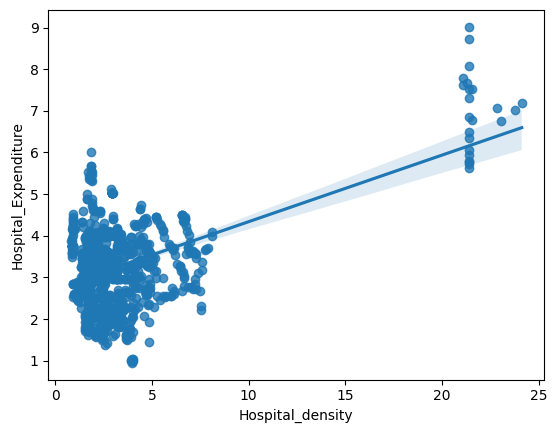

In [8]:
# visualising the regression plot for both correlating variables

sns.regplot(x='Hospital_density', y='Hospital_Expenditure', data=df)
plt.show()

In [9]:
features = df[['Hospital_Expenditure']]

features.head()

,Hospital_Expenditure
0,2.987
1,3.024
2,3.123
3,3.157
4,3.250


### ***Data splitting***

In [10]:
x_train, x_test, y_train, y_test = train_test_split(features, target, random_state=24)

In [11]:
reg_model = LinearRegression()

In [12]:
reg_model.fit(x_train, y_train)

LinearRegression()

In [13]:
predictions = reg_model.predict(x_test)

predictions[:10]

array([ 2.27424484,  1.90884438,  4.66085652,  1.47295328, 11.21648608,
        2.50010261,  2.98490558,  1.18667496,  2.53894439,  3.89409099])

### ***Evaluating and measuring model's performance***

In [14]:
# using Mean absolute error

mae = mean_absolute_error(y_test, predictions)
round(mae, 3)

1.973

*This **mae** value indicates that the prediction is close to the true value*

In [15]:
# using Residual sum of squares

rss = np.sqrt(mean_squared_error(y_test, predictions))

round(rss, 3)

2.975

In [16]:
# r-squared

rsquared = r2_score(y_test, predictions)

round(rsquared, 3)

0.343

*This r-squared value indicates that roughly **30%** variaton in our data was explained by our model*